In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
plt.style.use('ggplot')

In [130]:
def estimations_betas(X,y):
    beta_0, beta_1 = inv(X.T @ X) @ X.T @ y
    print(f'Beta 0: {beta_0}, Beta 1: {beta_1}')
    return beta_0, beta_1

def expected_value(beta_0, beta_1, x_lin_space):
    y_hat = beta_0 + beta_1 * x_lin_space
    return y_hat

def regression(x,y,x_lin_space,y_hat):
    plt.scatter(x, y, marker='x', color='#588da8');
    plt.plot(x_lin_space, y_hat, color='#e58a8a');

def residuals(y,y_hat):
    residuals = y-y_hat
    print(f'Promedio: {np.mean(residuals)}, Std: {np.std(residuals)}')
    sns.distplot(residuals, bins = 10, kde=True, color = '#75b79e');

Beta 0: 3.524606373821417, Beta 1: 4.9834582992367515
Beta 0: 1.8919205561630934, Beta 1: 4.67213567814685
Beta 0: 11.457546993043099, Beta 1: 4.914568256241551
Beta 0: 6.6665121937334035, Beta 1: 6.572168854142629


Promedio: -0.3518837945173708, Std: 9.489596050420914
Promedio: -0.32990119154365694, Std: 12.262462632229031
Promedio: -0.3470194436433347, Std: 12.780659375281024
Promedio: -0.46406322191133803, Std: 19.72258775421266


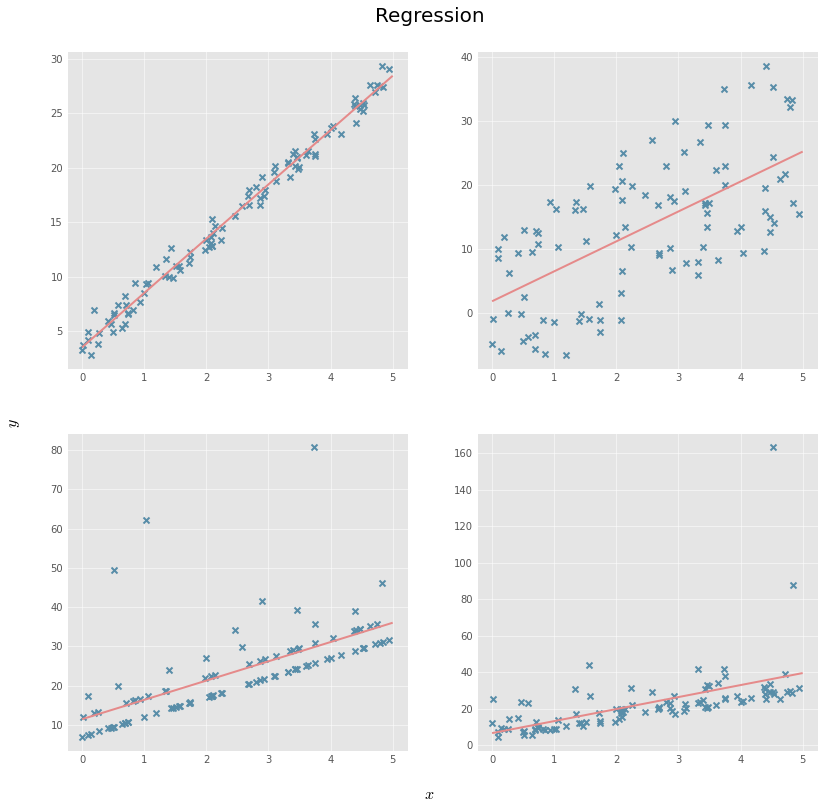

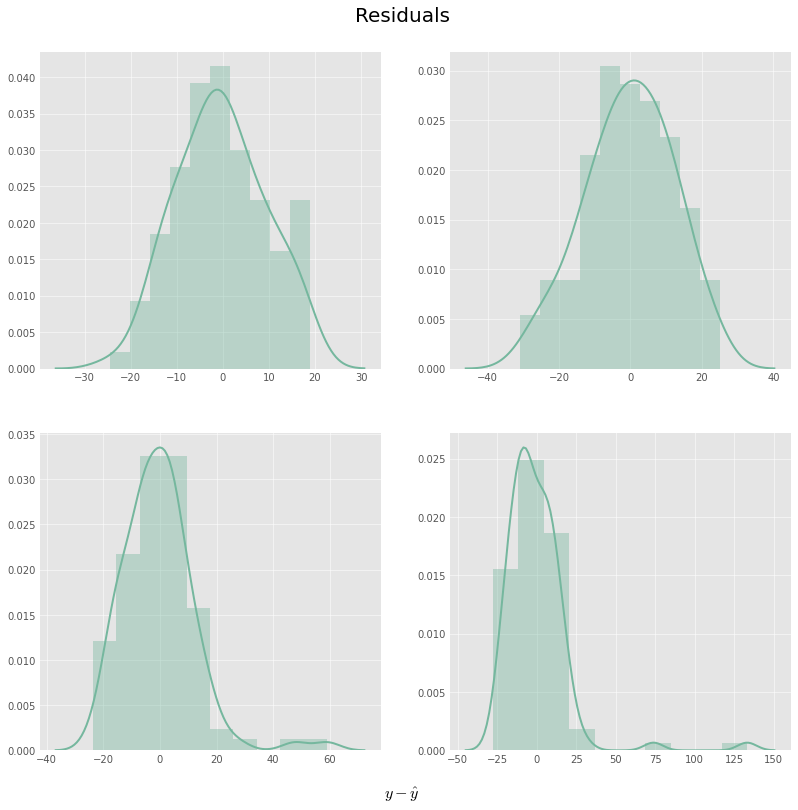

In [160]:
rng = np.random.RandomState(1)
tmp_sz = 100

b0 = 2
b1 = 5
scl = 5

x = 5 * rng.rand(tmp_sz)
X = np.asarray([np.ones(tmp_sz), x]).T
x_lin_space = np.linspace(0, 5, 100)
fig = plt.figure(figsize=(12,12))

#---------------------------Beta------------------------------
fig.add_subplot(2, 2, 1)
y_beta = (b0 + (b1 * x)) + rng.beta(a=2,b=5, size=tmp_sz)*scl#Distribución Beta
beta_0, beta_1 = estimations_betas(X,y_beta)
y_hat_B = expected_value(beta_0, beta_1, x_lin_space)
regression(x,y_beta,x_lin_space,y_hat_B)

#---------------------------Uniform------------------------------
fig.add_subplot(2, 2, 2)
y_unif = (b0 + (b1 * x)) + rng.uniform(low=-3, high = 3, size = tmp_sz)*scl#Distribución uniforme
beta_0, beta_1 = estimations_betas(X,y_unif)
y_hat_U = expected_value(beta_0, beta_1, x_lin_space)
regression(x,y_unif,x_lin_space,y_hat_U)

#---------------------------Logarítmica------------------------------
fig.add_subplot(2, 2, 3)
y_logs = (b0 + (b1 * x)) + rng.logseries(p=.66, size = tmp_sz)*scl#Distribución logaritmica
beta_0, beta_1 = estimations_betas(X,y_logs)
y_hat_L = expected_value(beta_0, beta_1, x_lin_space)
regression(x,y_logs,x_lin_space,y_hat_L)

#---------------------------Log-nor------------------------------
fig.add_subplot(2, 2, 4)
y_lognorm = (b0 + (b1 * x)) + rng.lognormal(size=tmp_sz)*scl #Distribución log-nor
beta_0, beta_1 = estimations_betas(X,y_lognorm)
y_hat_LN = expected_value(beta_0, beta_1, x_lin_space)
regression(x,y_lognorm,x_lin_space,y_hat_LN)


angle = 90

fig.text(0.5,0.92, r'Regression',ha='center',va='center',fontsize='20');
fig.text(0.02,0.45, r'$y$',ha='center',va='center',fontsize='16',rotation=angle, rotation_mode='anchor');
fig.text(0.5,0.02, r'$x$',ha='center',va='center',fontsize='16');

print('\n')
#---------------------------------Residuals-----------------------------------
fig = plt.figure(figsize=(12,12))

fig.add_subplot(2, 2, 1)
residuals(y_beta,y_hat_B)

fig.add_subplot(2, 2, 2)
residuals(y_unif,y_hat_U)

fig.add_subplot(2, 2, 3)
residuals(y_logs,y_hat_L)

fig.add_subplot(2, 2, 4)
residuals(y_lognorm,y_hat_LN)

angle = 90

fig.text(0.5,0.92, r'Residuals',ha='center',va='center',fontsize='20');
fig.text(0.5,0.02, r'$y-\^y$',ha='center',va='center',fontsize='16');
